In [1]:
import pandas as pd
import os
from datetime import datetime 
import re
import matplotlib.pyplot as plt

In [2]:
def extract_units():
    fetch_log="../log/data_entire_fetch.log"
    with open(fetch_log,'r') as f:
        units = set()
        while True:
            line = f.readline()
            if line.startswith("[INFO] Started to"):
                pass
            else:
                break
            p = re.compile("[A-Z0-9]+/([A-Z0-9]+)")
            patterns =p.search(line)
            unit = patterns.groups()[0]
            units.add(unit)
        return units

In [3]:
def df_gen():
    path = "../data_close/"
    file_list = os.listdir(path)
    for file in file_list:
        df_dict = dict()

        df=pd.read_csv(path+file,header=None,index_col=0,names=['close'])
        symbol_c = file.split('_')[1]

        for unit in extract_units():
            if symbol_c.endswith(unit):
                symbol = "{}/{}".format(symbol_c[:-len(unit)],unit)
                break
        yield symbol,df

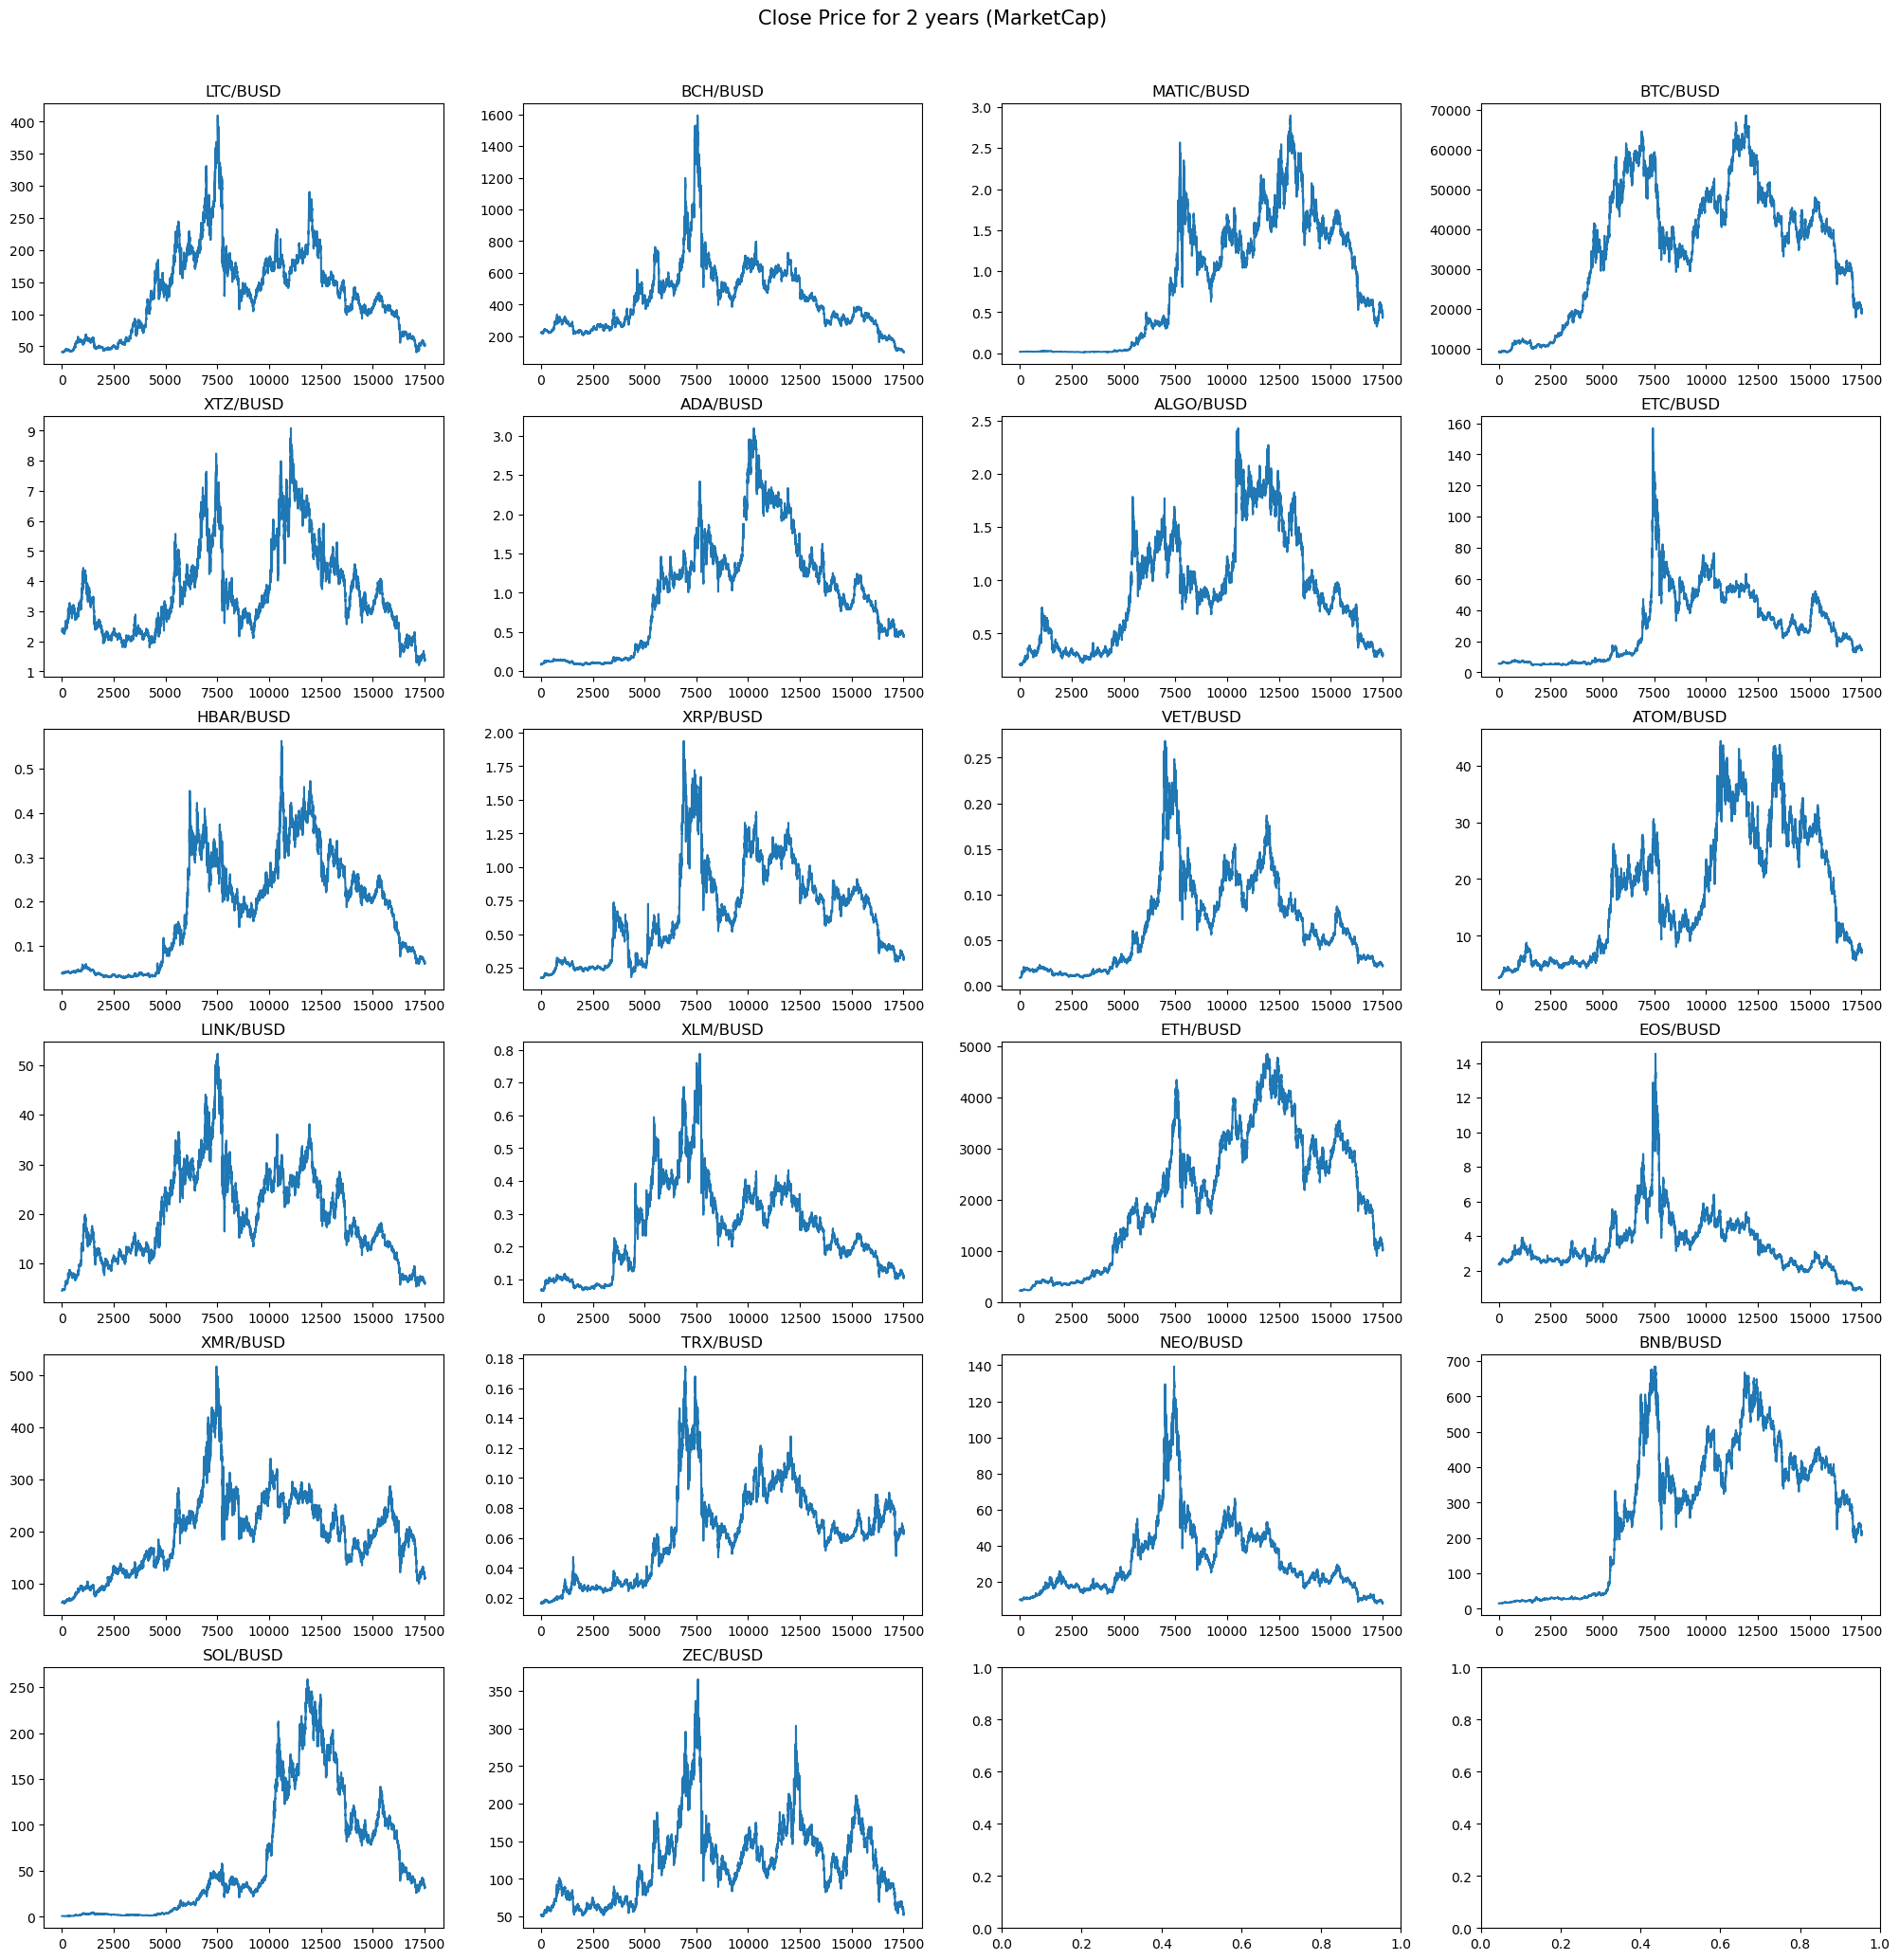

In [69]:
df_g = df_gen()
row,col=6,4
fig, axs = plt.subplots(row,col,figsize=(25,25))
for i in range(row):
    for j in range(col):
        try:
            df=next(df_g)
            axs[i,j].plot(df[1].values)
            axs[i,j].set_title(df[0])
        except:
            break
fig.suptitle('Close Price for 2 years (MarketCap)',x=0.5,y=0.92,fontsize=15)
plt.show()
        

In [74]:
pdf=df[1].copy(deep=True)

In [88]:
def SMA(df, window=2):
    return df['close'].rolling(window=window, min_periods=1).mean()
win =5
pdf['MA(%d)'%win] = SMA(pdf,win)

In [89]:
def EMA(df, span=2):
    return df['close'].ewm(span=span).mean()
win=5
pdf['EMA(%d)'%win] = EMA(pdf, win)

<AxesSubplot:>

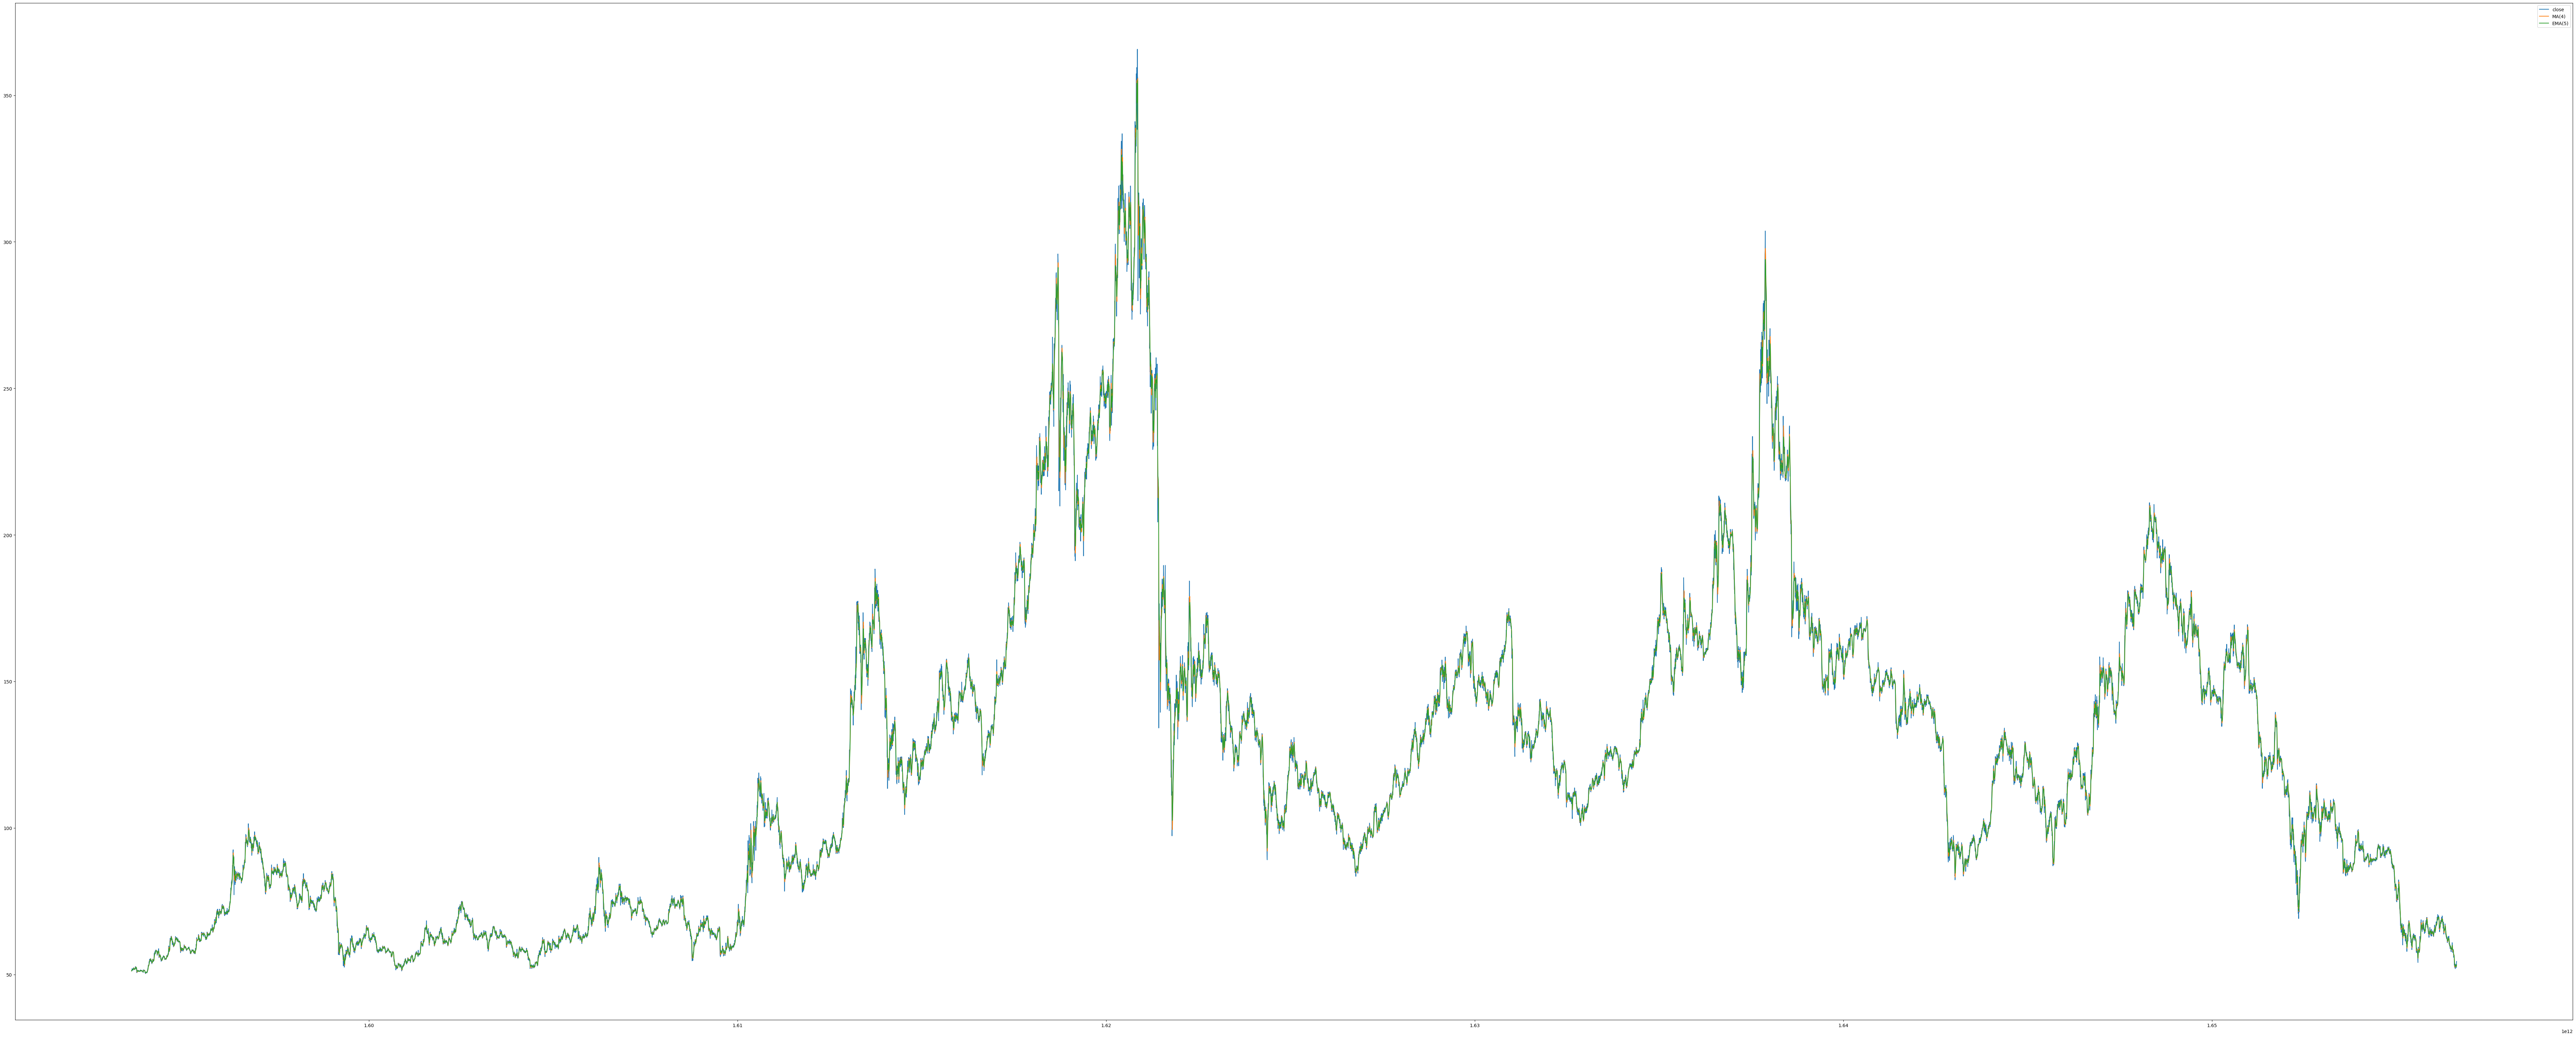

In [92]:
pdf[['close','MA(4)','EMA(5)']].plot(figsize=(100,40))

In [56]:
df[1].drop('MA(5)',axis=1,inplace=True)